# 问题描述
场景：初中高中阶段美术特长生的美术作品自动打分，可以极大的帮助老师减轻工作负担
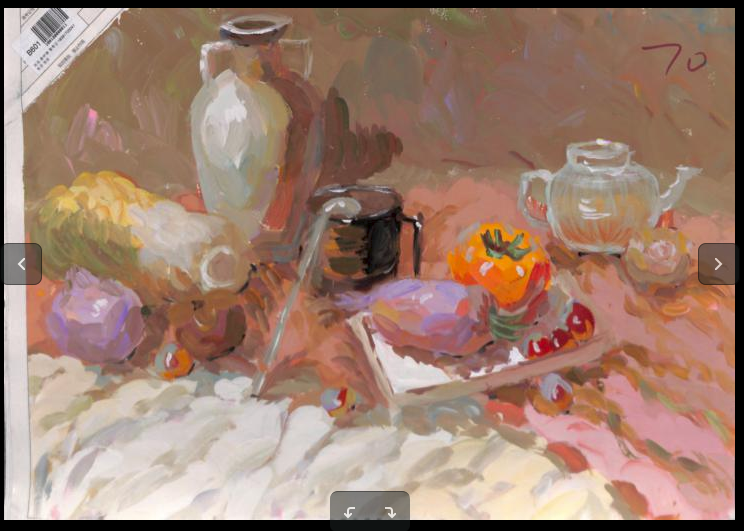

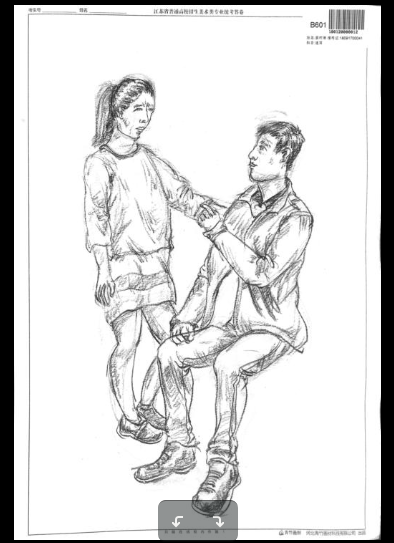

目标
- 尽可能的对新来的美术作品利用机器自动的给出合理的分数，以人类审美为依据。

# 实验数据

## 速写数据集分布
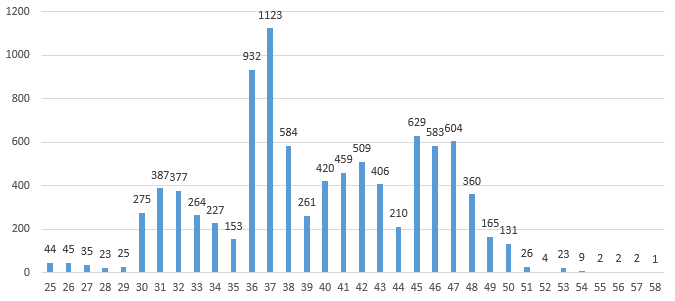

## 数据增强，数据均衡
通过随机裁剪和随机水平翻转
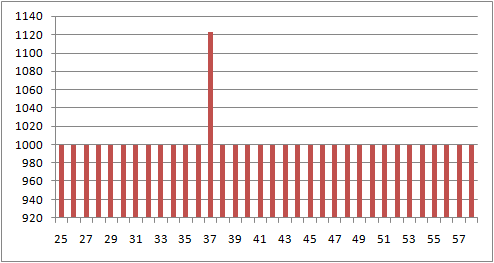

## 数据统计

- 素写+油画 共计6w张
- 数据增强至87648张，（数据增强方式和数量有待研究）


# 获取训练图片

路线
- 用神经网络检测出图片的绘画主体部分，并抠出来
- 用文本检测ctpn网络检测出图片上的分数
- 用ocr算法识别出数字，得到训练数据的label
- 划分训练集和验证集，训练模型

## fine-tune ctpn

步骤
- 人工标注了350张左右的数据
- 在之前训练快递单检测的结果基础上继续训练30个epoch

效果展示

检测结果1
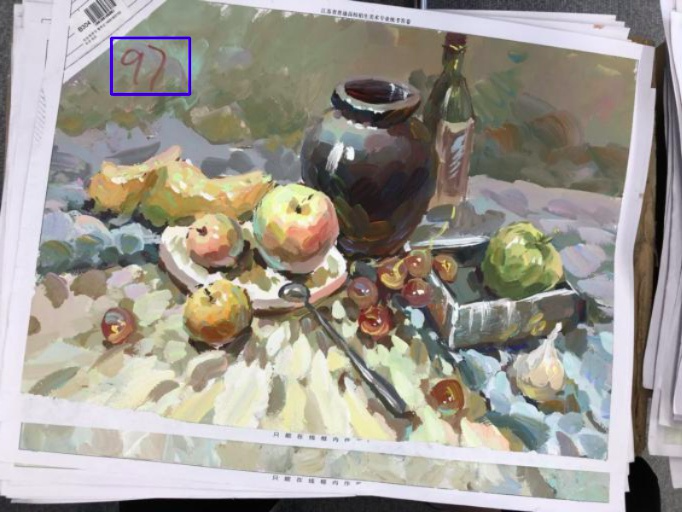

检测结果2
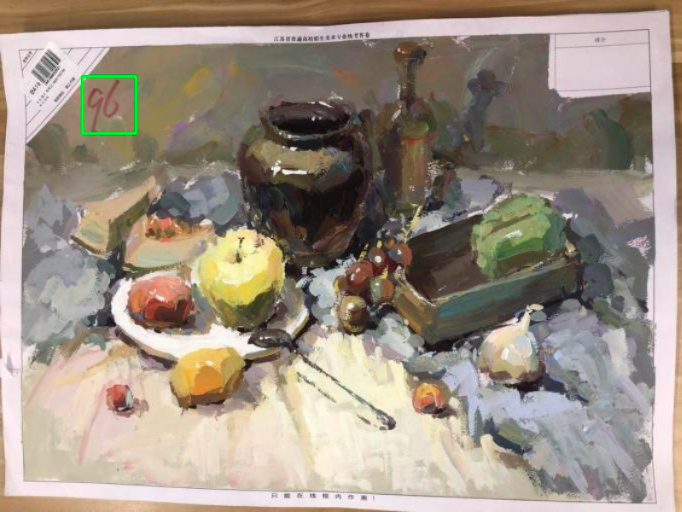

## fine-tune ocr模型
- 模型选择：densenet+CTC
- 人工标注了2700张左右的数据
- 训练30个epoch

# 给图片打分

## 选择模型
NIMA：一个较为简单的分类模型： CNN+EMD loss

## 实验不同的骨干网络
- vgg 19/16
- resnet
- densent101
    - 参数量 ～7M
- pnasnet -5-large
    - 该网络参数量比较大，达到80M，
    - 不同网络在imagenet上的精度对比如下

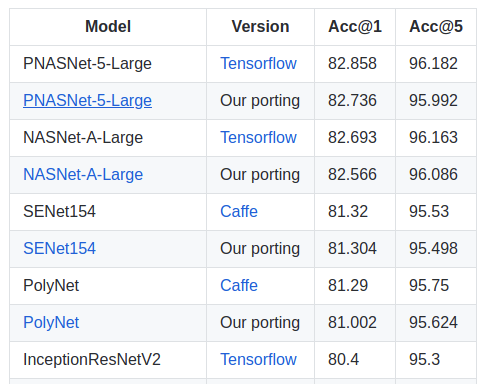

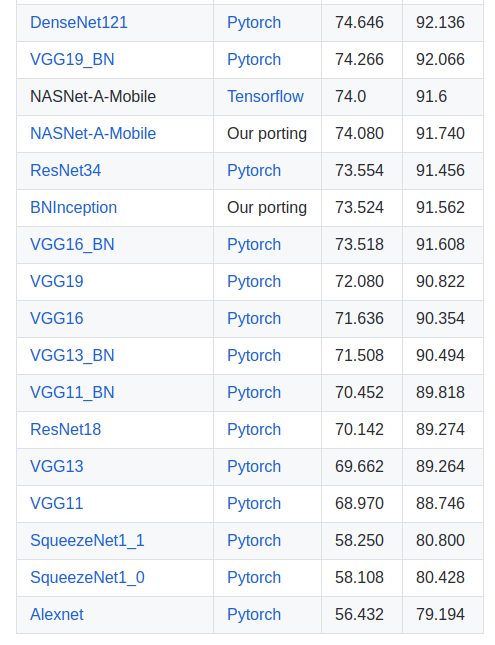

## 实验结果
- 以正负误差小于5分作为正确预测
- vgg19 ：78%
- resnet：62%
- densenet：实验结果
- pnasnet-5-large：56%
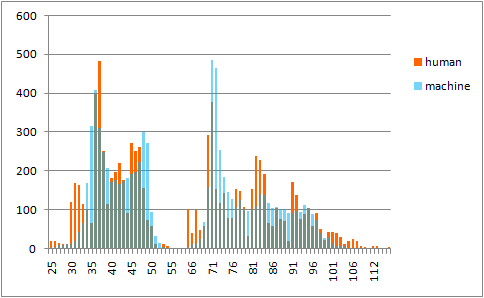

实验结果1
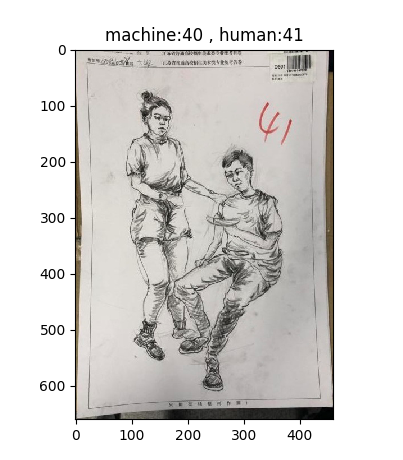

实验结果2
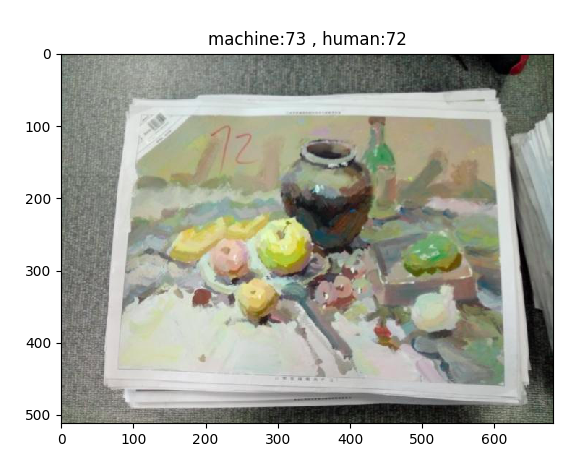

## 实验中出现的问题
- 问题描述：参考的实现代码将结果分为10类，我们将至调整为更多类时，模型训练不收敛，结果出现异常。
- 解决方案：追溯论文中的损失函数的实现细节，找到一处细微的错误，纠正后，模型可以在分为任意多类的情况下正常训练。
- 收获：类间有联系的分类问题可以使用emd损失来替代交叉熵损失。


# references
- 打分模型： NIMA: Neural Image Assessment
- The Earth Mover’s Distance is the Mallows Distance: Some Insights from Statistics
- Squared Earth Mover’s Distance-based Loss for Training Deep Neural Networks